In [46]:
import pandas as pd
df=pd.read_csv("processed.cleveland.data",names=["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"])

In [47]:
df.head(n=10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [48]:
df.groupby('num').size()

num
0    164
1     55
2     36
3     35
4     13
dtype: int64

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [50]:
df['ca'] = pd.to_numeric(df['ca'],errors='coerce')
df['thal'] = pd.to_numeric(df['thal'],errors='coerce')
df['ca'] = pd.to_numeric(df['num'],errors='coerce')

# Cleaning the Dataset

In [51]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        2
num         0
dtype: int64

In [52]:
mean_value=df['thal'].mean()
df.fillna(value=mean_value,inplace=True)
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

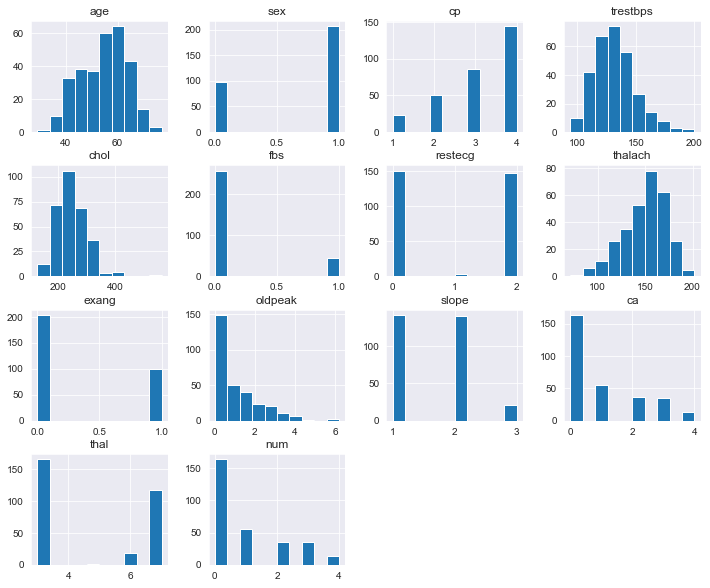

In [53]:
import matplotlib.pyplot as plt
df.hist(figsize=(12,10))
plt.show()


D:\ProgramData\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


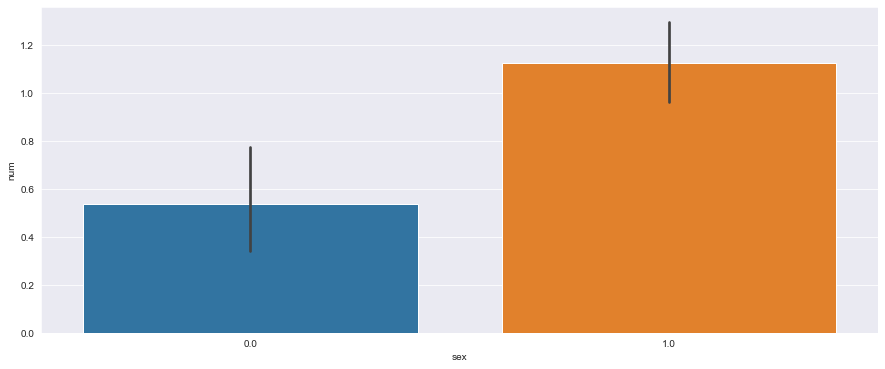

In [54]:
import seaborn as sns
x_val=df['sex']
y_val=df['num']
sns.barplot(x_val,y_val)
plt.show()

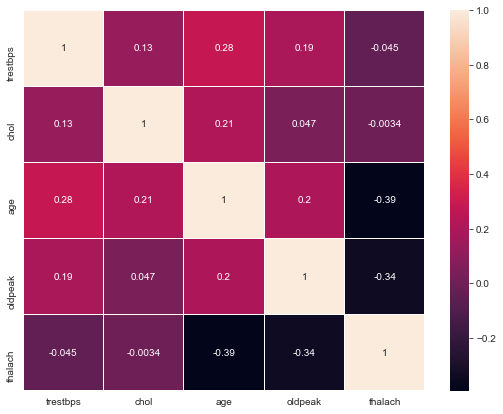

In [55]:
numeric_columns=['trestbps','chol', 'age', 'oldpeak', 'thalach']
sns.heatmap(df[numeric_columns].corr(),annot=True,linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(9,7)
plt.show()

# Processing Data Set

In [56]:
x,y=df.loc[:,:'thal'],df['num']

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=10,test_size=0.3,shuffle=True)

In [58]:
x.size

3939

In [59]:
x_train.shape

(212, 13)

In [60]:
x_test.shape

(91, 13)

In [61]:
y.size

303

In [62]:
y_train.shape

(212,)

In [63]:
y_test.shape

(91,)

# KNN

In [64]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [65]:
knn=KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [66]:
knn_prediction = knn.predict(x_test)

In [67]:
knn_accuracy_model = accuracy_score(y_test,knn_prediction)

In [68]:
knn_accuracy_model*100

48.35164835164835

# Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
logistic= LogisticRegression(random_state=0)

In [71]:
logistic.fit(x_train,y_train)

D:\ProgramData\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [72]:
lr_prediction=logistic.predict(x_test)

In [73]:
lr_accuracy_model = accuracy_score(y_test,lr_prediction)

In [74]:
lr_accuracy_model*100

58.24175824175825

# Random Forest Classifier

In [75]:
from sklearn.ensemble import RandomForestClassifier 

In [76]:
random_forest= RandomForestClassifier(n_estimators= 10, criterion="entropy")

In [77]:
random_forest.fit(x_train, y_train) 

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [78]:
rf_prediction=random_forest.predict(x_test)

In [79]:
rf_accuracy_model = accuracy_score(y_test,rf_prediction)

In [80]:
rf_accuracy_model*100

76.92307692307693

In [81]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [82]:
accuracy_score(rf_prediction,y_test)

0.7692307692307693

In [83]:
confusion_matrix(rf_prediction,y_test)

array([[45,  0,  0,  1,  0],
       [ 0, 11,  8,  2,  0],
       [ 0,  0,  8,  2,  2],
       [ 0,  0,  1,  6,  5],
       [ 0,  0,  0,  0,  0]], dtype=int64)

<AxesSubplot:>

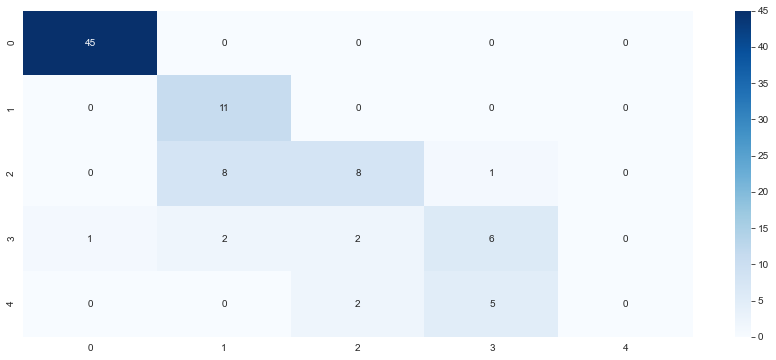

In [84]:
sns.heatmap(confusion_matrix(y_test,rf_prediction),annot=True,cmap='Blues')

In [85]:
from sklearn.metrics import classification_report
print(classification_report(y_test,rf_prediction))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        45
           1       0.52      1.00      0.69        11
           2       0.67      0.47      0.55        17
           3       0.50      0.55      0.52        11
           4       0.00      0.00      0.00         7

    accuracy                           0.77        91
   macro avg       0.53      0.60      0.55        91
weighted avg       0.73      0.77      0.74        91



D:\ProgramData\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ProgramData\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ProgramData\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [86]:
list1=[]
list1.append(knn_accuracy_model)
list1.append(lr_accuracy_model)
list1.append(rf_accuracy_model)


In [87]:
list2 = ["KNearestNeighbours","Logistic Regression","RandomForest"]

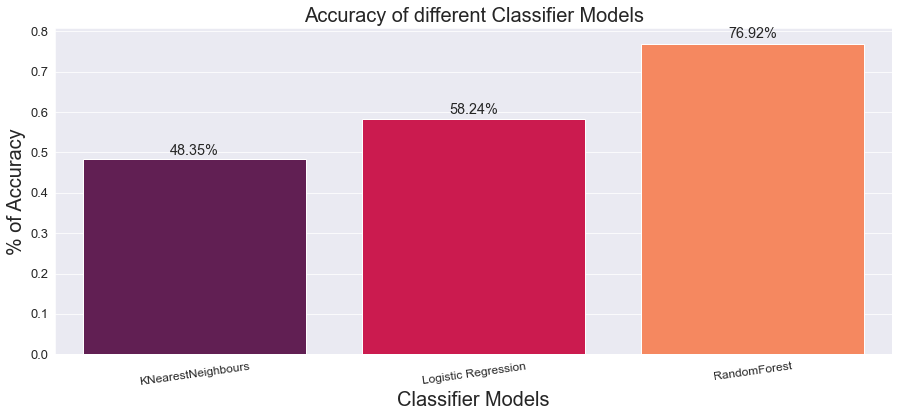

In [88]:
plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")
ax = sns.barplot(x=list2, y=list1, palette = "rocket", saturation =2.5)
plt.xlabel("Classifier Models", fontsize = 20 )
plt.ylabel("% of Accuracy", fontsize = 20)
plt.title("Accuracy of different Classifier Models", fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()